In [49]:
%pip install opendatasets --upgrade


In [51]:
import opendatasets as od

# First dataset
od.download('https://www.kaggle.com/datasets/saraparsaseresht/persian-traffic-sign-dataset-ptsd?resource=download')

# Second dataset
od.download('https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Train')

Skipping, found downloaded files in "./persian-traffic-sign-dataset-ptsd" (use force=True to force download)


In [53]:
#moving class speed=30
!mv "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train/10_Maximum Speed 30"/* "/content/gtsrb-german-traffic-sign/Train/1/"
#moving class speed=50
!mv "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train/12_Maximum Speed 50"/* "/content/gtsrb-german-traffic-sign/Train/2/"
#moving class speed=60
!mv "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train/13_Maximum Speed 60"/* "/content/gtsrb-german-traffic-sign/Train/3/"
#moving class speed=70
!mv "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train/14_Maximum Speed 70"/* "/content/gtsrb-german-traffic-sign/Train/4/"
#moving class speed=80
!mv "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train/15_Maximum Speed 80"/* "/content/gtsrb-german-traffic-sign/Train/5/"

mv: cannot stat '/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train/10_Maximum Speed 30/*': No such file or directory


In [58]:
import os
import numpy as np
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from keras import layers
from tensorflow import data as tf_data
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

In [59]:
import tensorflow as tf
from tensorflow import keras # Import the keras module
image_size = (128, 128)
batch_size = 128
"""
test_ds = keras.utils.image_dataset_from_directory(
    "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    class_names=[ '10_Maximum Speed 30', '12_Maximum Speed 50','13_Maximum Speed 60',"14_Maximum Speed 70","15_Maximum Speed 80"]
)"""

'\ntest_ds = keras.utils.image_dataset_from_directory(\n    "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train",\n    seed=1337,\n    image_size=image_size,\n    batch_size=batch_size,\n    class_names=[ \'10_Maximum Speed 30\', \'12_Maximum Speed 50\',\'13_Maximum Speed 60\',"14_Maximum Speed 70","15_Maximum Speed 80"]\n)'

In [60]:
print(os.listdir("/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/test"))


['PTSD_00506.jpg', 'PTSD_02215.jpg', 'PTSD_00197.jpg', 'PTSD_00618.jpg', 'PTSD_00474.jpg', 'PTSD_02315.jpg', 'PTSD_00360.jpg', 'PTSD_02181.jpg', 'PTSD_01060.jpg', 'PTSD_02135.jpg', 'PTSD_00687.jpg', 'PTSD_02276.jpg', 'PTSD_01078.jpg', 'PTSD_01145.jpg', 'PTSD_00220.jpg', 'PTSD_00700.jpg', 'PTSD_00031.jpg', 'PTSD_01833.jpg', 'PTSD_00091.jpg', 'PTSD_00481.jpg', 'PTSD_00976.jpg', 'PTSD_00254.jpg', 'PTSD_01598.jpg', 'PTSD_01362.jpg', 'PTSD_00081.jpg', 'PTSD_01535.jpg', 'PTSD_00794.jpg', 'PTSD_01368.jpg', 'PTSD_01129.jpg', 'PTSD_00630.jpg', 'PTSD_00130.jpg', 'PTSD_02160.jpg', 'PTSD_01484.jpg', 'PTSD_01025.jpg', 'PTSD_01875.jpg', 'PTSD_00580.jpg', 'PTSD_01334.jpg', 'PTSD_01215.jpg', 'PTSD_02083.jpg', 'PTSD_00758.jpg', 'PTSD_00697.jpg', 'PTSD_00631.jpg', 'PTSD_01490.jpg', 'PTSD_01118.jpg', 'PTSD_01029.jpg', 'PTSD_00641.jpg', 'PTSD_00240.jpg', 'PTSD_01056.jpg', 'PTSD_00020.jpg', 'PTSD_01832.jpg', 'PTSD_00993.jpg', 'PTSD_00688.jpg', 'PTSD_00441.jpg', 'PTSD_01749.jpg', 'PTSD_01564.jpg', 'PTSD_022

In [61]:
train_ds, val_ds=keras.utils.image_dataset_from_directory (
    "/content/gtsrb-german-traffic-sign/Train",
    seed=1337,
    validation_split=0.2,
    subset="both",
    image_size=image_size,
    batch_size=batch_size,
    #1:30,2:50,3:60,4:70,5:80,
    class_names=[ '1', '2','3', '4', '5']
)

Found 10853 files belonging to 5 classes.
Using 8683 files for training.
Using 2170 files for validation.


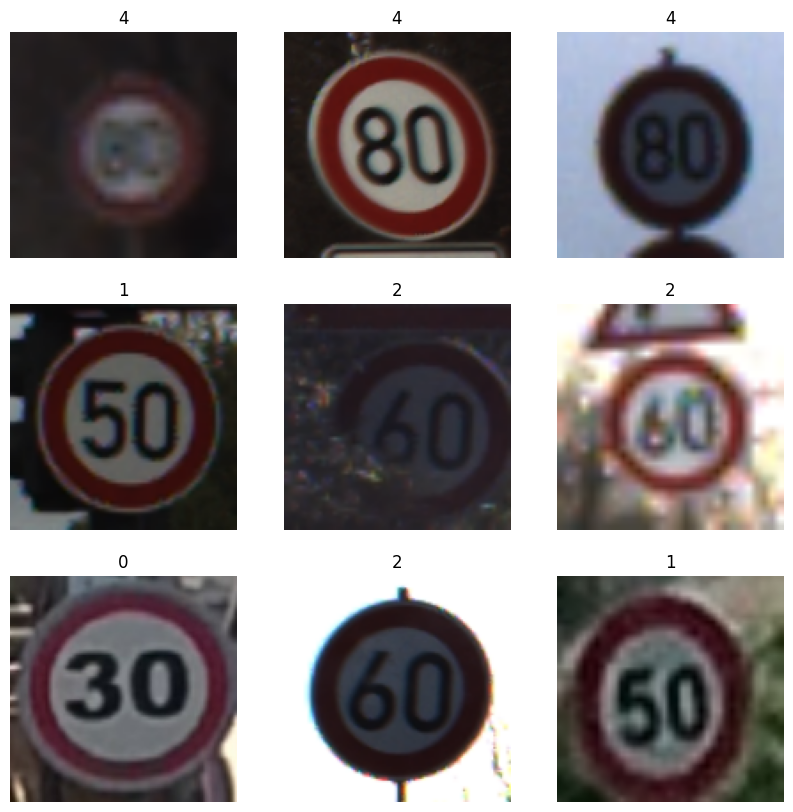

In [63]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [64]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

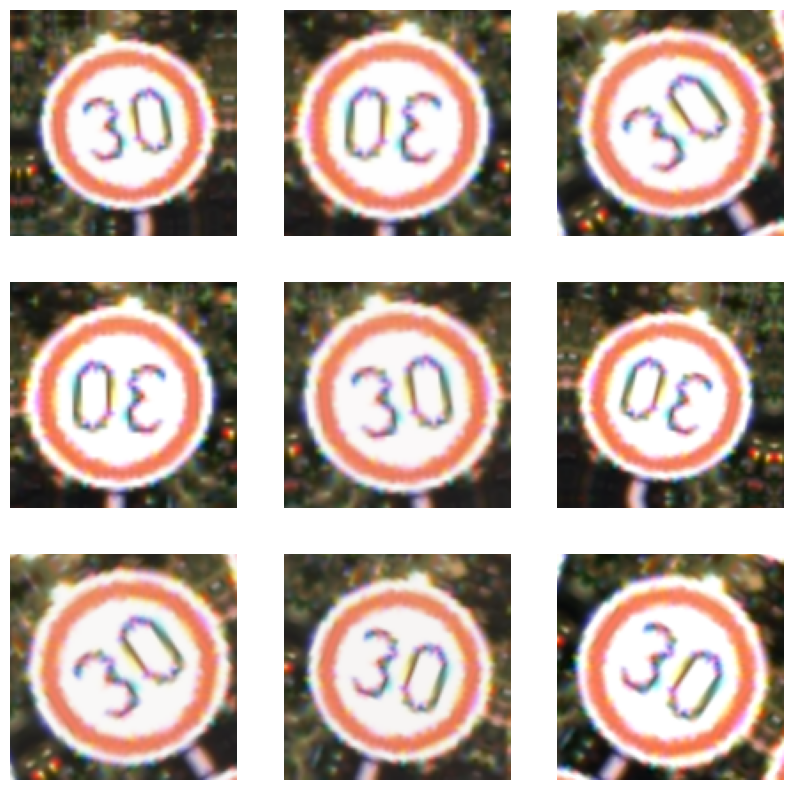

In [65]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [68]:
model = Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation="softmax")
  ])

In [70]:
def count_images(folder_path):
  image_counts = {}
  for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):
      count = len([f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
      image_counts[subfolder] = count

  return image_counts

# Example usage:
train_folder = "/content/gtsrb-german-traffic-sign/Train"
image_counts = count_images(train_folder)

for subfolder, count in image_counts.items():
  print(f"Subfolder '{subfolder}': {count} images")

Subfolder '15': 630 images
Subfolder '2': 2618 images
Subfolder '8': 1410 images
Subfolder '16': 420 images
Subfolder '21': 330 images
Subfolder '31': 780 images
Subfolder '25': 1500 images
Subfolder '36': 390 images
Subfolder '22': 390 images
Subfolder '5': 1860 images
Subfolder '26': 600 images
Subfolder '11': 1320 images
Subfolder '27': 240 images
Subfolder '9': 1470 images
Subfolder '14': 780 images
Subfolder '33': 689 images
Subfolder '32': 240 images
Subfolder '29': 270 images
Subfolder '41': 240 images
Subfolder '28': 540 images
Subfolder '30': 450 images
Subfolder '40': 360 images
Subfolder '0': 210 images
Subfolder '42': 240 images
Subfolder '24': 270 images
Subfolder '4': 1980 images
Subfolder '7': 1440 images
Subfolder '38': 2070 images
Subfolder '35': 1200 images
Subfolder '19': 210 images
Subfolder '18': 1200 images
Subfolder '6': 420 images
Subfolder '10': 2010 images
Subfolder '23': 510 images
Subfolder '13': 2160 images
Subfolder '12': 2100 images
Subfolder '37': 210 im

In [77]:
#1:30,2:50,3:60,4:70,5:80,
#'30': 2697 images aka the weight is 24.8%
#'50': 2618 images aka the weight is 24.1%
#'60': 1698 images aka the weight is 15.6%
#'70': 1980 images aka the weight is 18.2%
#'80': 1860 images aka the weight is 17.1%
weights={1: 0.805 , 2: 0.83, 3: 1.3, 4: 1.1, 5: 1.17}

In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 59, 59, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,889,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,924,903 (26.42 MB)

 Trainable params: 6,924,903 (26.42 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
metrics = ['accuracy']

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [80]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [81]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=metrics)

In [82]:
history = model.fit(train_ds, batch_size=128, epochs=20, validation_data=val_ds, validation_batch_size=128,callbacks=(early_stopping),class_weight=weights)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.3583 - loss: 1.5834 - val_accuracy: 0.6793 - val_loss: 0.8485
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.7910 - loss: 0.5838 - val_accuracy: 0.8673 - val_loss: 0.3929
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.9050 - loss: 0.2767 - val_accuracy: 0.9258 - val_loss: 0.2449
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9449 - loss: 0.1680 - val_accuracy: 0.9433 - val_loss: 0.1990
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9637 - loss: 0.1123 - val_accuracy: 0.9488 - val_loss: 0.1869
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9767 - loss: 0.0753 - val_accuracy: 0.9484 - val_loss: 0.1889
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9815 - loss: 0.0584 - val_accuracy: 0.9548 - val_loss: 0.1659
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9539 -

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [83]:
model.evaluate(test_ds)

NameError: name 'test_ds' is not defined

In [ ]:
test_ds.evaluate

In [ ]:
#plotting graphs for accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Assuming 'history' is the variable that stores the output of model.fit()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show() # Added to display the plot

In [ ]:
# Assuming 'model' is your defined Keras model and you have training and validation data
history = model.fit(train_ds, epochs=10, validation_data=val_ds) # Train the model and store history

# Now you can plot the training history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
model.save("model.h5")